In [2]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, deprocess_image, preprocess_image



In [3]:
import pandas as pd

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [5]:
num_classes = 27
weights_path = "./resnet18savedweights.pt"
model = models.resnet18(weights=None)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)
model.load_state_dict(torch.load(weights_path, map_location=device))

<All keys matched successfully>

In [6]:
model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
target_layers = [model.layer4[-1]]
transform = transforms.Compose([
    transforms.Resize((256, 256)), 
    transforms.CenterCrop(224),
    transforms.ToTensor(), 
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

cam = GradCAM(model=model, target_layers=target_layers)

In [8]:
def run_gradCAM(image_path): 
    original_pil_img = Image.open(image_path).convert('RGB')
    input_tensor = transform(original_pil_img).unsqueeze(0).to(device) 
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets,
                        aug_smooth=True,       
                        eigen_smooth=True)     

    grayscale_cam = grayscale_cam[0, :]

    display_img_pil = original_pil_img.resize((224, 224))
    display_img_np = np.array(display_img_pil) / 255.0
    display_img_np = np.float32(display_img_np)

    cam_image = show_cam_on_image(display_img_np, grayscale_cam, use_rgb=True)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(display_img_pil) # Show original resized image
    ax[0].set_title(f"Original Image: {image_path.split('/')[-1]}")
    ax[0].axis('off')

    ax[1].imshow(cam_image)
    ax[1].set_title(f"Grad-CAM: ")
    ax[1].axis('off')

    plt.suptitle(f"Grad-CAM for Fine-tuned ResNet18")
    plt.tight_layout()
    plt.show()



In [8]:
df = pd.read_csv("vae64labels.csv")
df["img_paths"][2]

'extracted/Impressionism/paul-gauguin_hillside-1884.jpg'

/tmp/ipykernel_1642565/1007013817.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  display_img_np = np.array(display_img_pil) / 255.0


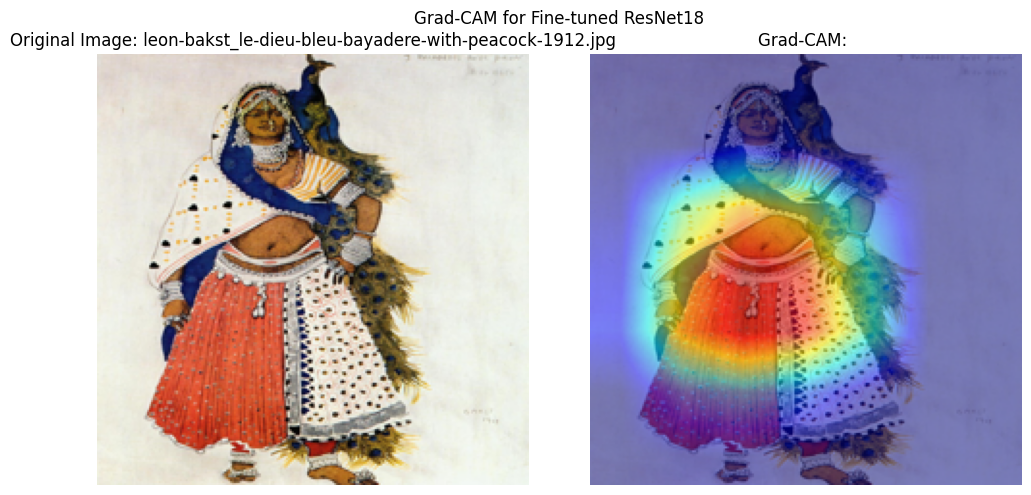

In [9]:
targets = None
run_gradCAM('extracted/Art_Nouveau_Modern/leon-bakst_le-dieu-bleu-bayadere-with-peacock-1912.jpg')

/tmp/ipykernel_1642565/1007013817.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  display_img_np = np.array(display_img_pil) / 255.0


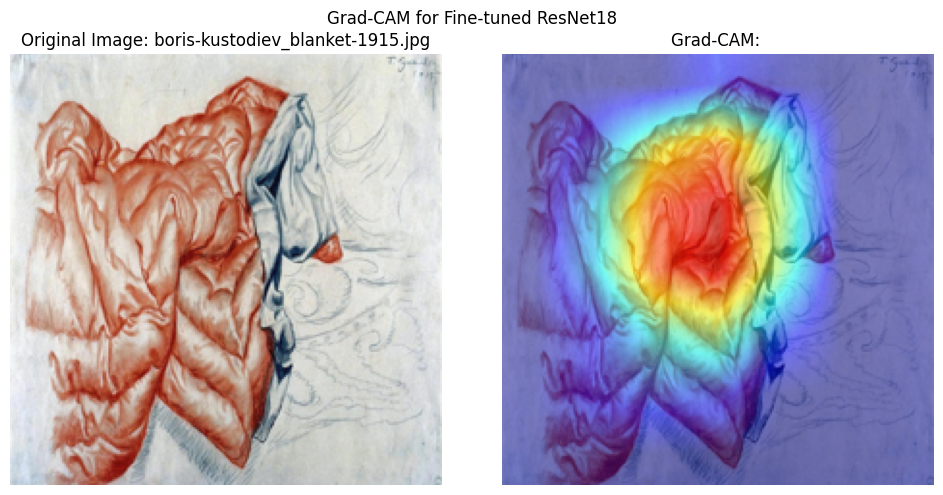

In [10]:
targets = None
run_gradCAM('extracted/Art_Nouveau_Modern/boris-kustodiev_blanket-1915.jpg')

/tmp/ipykernel_1642565/1007013817.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  display_img_np = np.array(display_img_pil) / 255.0


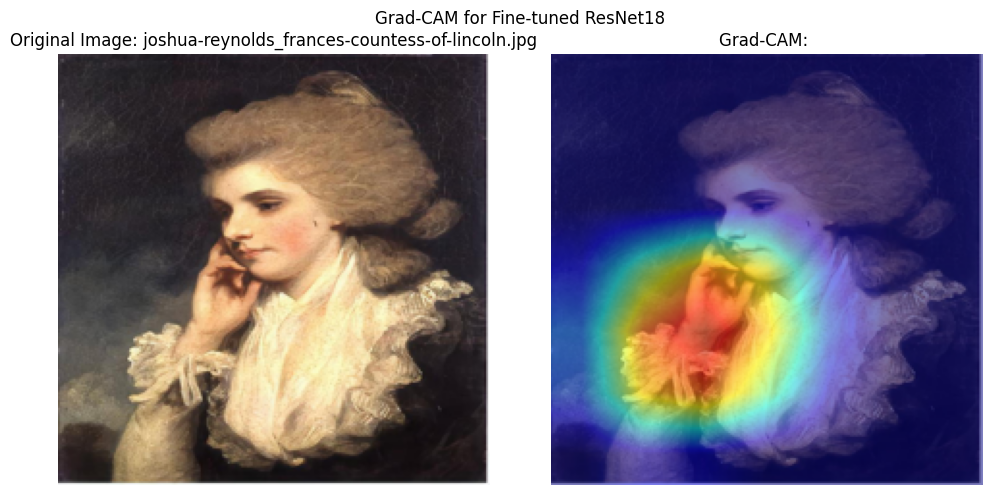

In [11]:
targets = None
run_gradCAM('extracted/Rococo/joshua-reynolds_frances-countess-of-lincoln.jpg')

/tmp/ipykernel_1642565/1007013817.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  display_img_np = np.array(display_img_pil) / 255.0


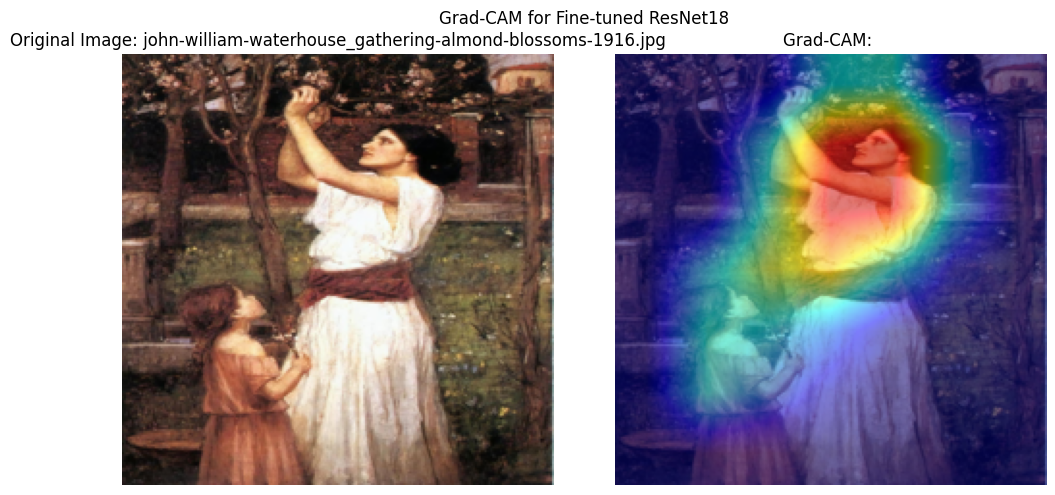

In [12]:
targets = None
run_gradCAM('extracted/Romanticism/john-william-waterhouse_gathering-almond-blossoms-1916.jpg')

/tmp/ipykernel_1642565/1007013817.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  display_img_np = np.array(display_img_pil) / 255.0


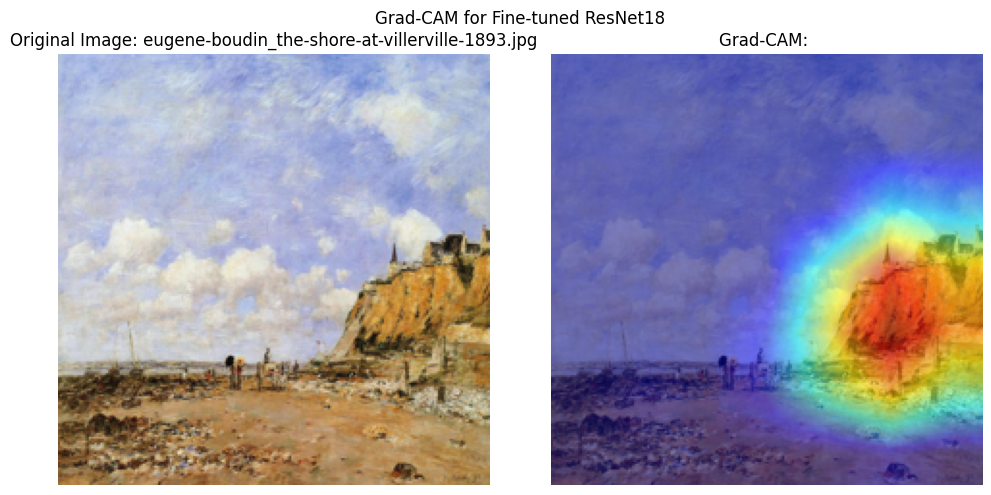

In [13]:
targets = None
run_gradCAM('extracted/Impressionism/eugene-boudin_the-shore-at-villerville-1893.jpg')

/tmp/ipykernel_1642565/1007013817.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  display_img_np = np.array(display_img_pil) / 255.0


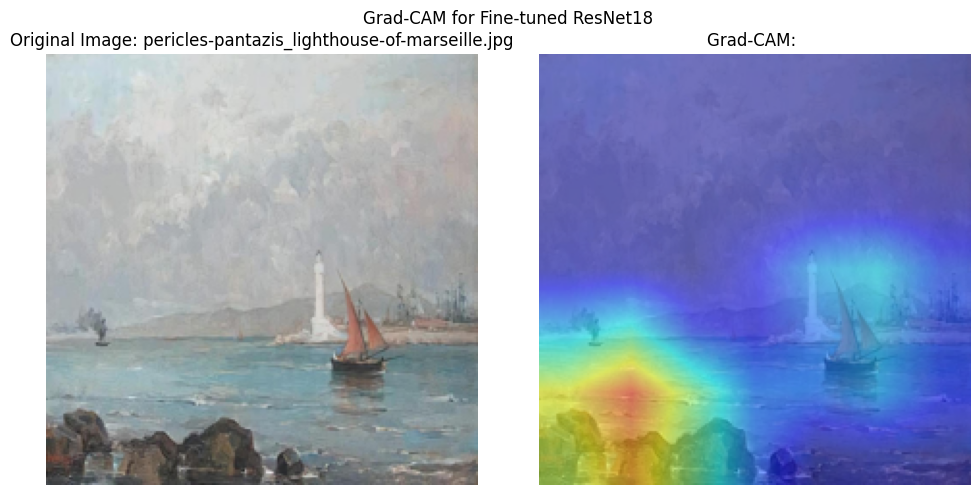

In [14]:
targets = None
run_gradCAM('extracted/Impressionism/pericles-pantazis_lighthouse-of-marseille.jpg')